<a href="https://colab.research.google.com/github/rabbanyk/comp551-notebooks/blob/master/bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging

Lets create out synthetic example.

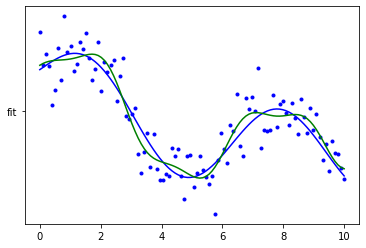

In [29]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')



N = 100
x = np.linspace(0,10, N)
yt = np.sin(x) + np.cos(x**.5)                        
y = yt + .5*np.random.randn(N) 
plt.plot(x, yt, 'b-', label='correct model')

#x: N
#y: N
plt.plot(x, y, 'b.')
phi = lambda x,mu: np.exp(-(x-mu)**2)
D = 10
mu = np.linspace(0,D,D) #10 Gaussians bases
Phi = phi(x[:,None], mu[None,:]) #N x 10
w = np.linalg.lstsq(Phi, y)[0]
yh = np.dot(Phi,w)
plt.plot(x, yh, 'g-', 'fit')


Now we fit linear model to 500 bootstrap samples from this toy data, and plot the distribution of model weights obtained for all samples  


(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           1.,   0.,   1.,   3.,   3.,   2.,   2.,   5.,  12.,  16.,  18.,
          26.,  35.,  53.,  47.,  45.,  80.,  51.,  35.,  36.,  11.,  10.,
           4.,   1.,   2.,   0.,   0.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   1.,   0.,   0.,   1.,   3.,   6.,  11.,  24.,  35.,  55.,
          76.,  69.,  69.,  53.,  44.,  26.,  13.,  10.,   2.,   1.,   1.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,  10.,  10.,  18.,  48.,  61.,  67.,  79.,  69.,  55.,  34.,
        

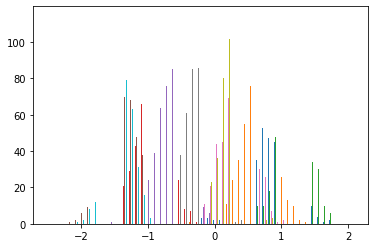

In [30]:
#Phi: N x D
#y: N
B = 500

ws = np.zeros((B,D))
for b in range(B):
  inds = np.random.randint(N, size=(N))
  Phi_b = Phi[inds,:] #N x D

  y_b = y[inds] #N
  #fit the subsampled data
  ws[b,:] = np.linalg.lstsq(Phi_b, y_b)[0]
plt.hist(ws, bins=50)

lets plot the predictions from these 500 models on a test data, and compute their average predictions as the final prediction, plus plot the confidence intervals.

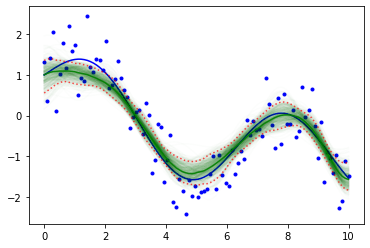

In [27]:
#Phi: N x D
#Phi_test: Nt x D
#y: N

Nt = 100
xt = np.linspace(0,10, Nt)
yt = np.sin(xt) + np.cos(xt**.5)                
plt.plot(xt, yt, 'b-', label='correct model')
yt = yt  + .5*np.random.randn(Nt)
plt.plot(xt, yt, 'b.')

Phi_test = phi(xt[:,None], mu[None,:]) #N x 10

#ws: B x D from previous code
y_hats = np.zeros((B, Nt))
for b in range(B):
  wb = ws[b,:]
  y_hats[b,:] = np.dot(Phi_test, wb)
  plt.plot(xt, y_hats[b,:], 'g-', alpha = 0.01)

# get 95% quantiles
y_5 = np.quantile(y_hats, .05, axis=0)
yB = np.mean(y_hats, axis=0)
y_95 = np.quantile(y_hats, .95, axis=0)

plt.plot(xt, y_5, 'r:', alpha = 0.7)
plt.plot(xt, y_95, 'r:', alpha = 0.7)
plt.plot(xt, y_50, 'g-', alpha = 0.9)


